In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import plotly.express as px
df = pd.read_csv('../data/train.csv')
df.head(10)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [5]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
with pd.option_context('display.max_rows', 1055, 'display.max_columns', None): 
    display(df)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [7]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
df['blue'] = df['blue'].astype('category')
df['dual_sim'] = df['dual_sim'].astype('category')
df['four_g'] = df['four_g'].astype('category')
df['three_g'] = df['three_g'].astype('category')
df['touch_screen'] = df['touch_screen'].astype('category') 
df['wifi'] = df['wifi'].astype('category') 
df['price_range'] = df['price_range'].astype('category')
df['fc'] = df['fc'].astype('int8')
df['int_memory'] = df['int_memory'].astype('int8')
df['n_cores'] = df['n_cores'].astype('int8')
df['pc'] = df['pc'].astype('int8')
df['sc_h'] = df['sc_h'].astype('int8')
df['sc_w'] = df['sc_w'].astype('int8')
df['talk_time'] = df['talk_time'].astype('int8')
df['battery_power'] = df['battery_power'].astype('int16')
df['mobile_wt'] = df['mobile_wt'].astype('int16')
df['px_height'] = df['px_height'].astype('int16')
df['px_width'] = df['px_width'].astype('int16')
df['ram'] = df['ram'].astype('int16')
df['clock_speed'] = df['clock_speed'].astype('float16')
df['m_dep'] = df['m_dep'].astype('float16')

In [9]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  2000 non-null   int16   
 1   blue           2000 non-null   category
 2   clock_speed    2000 non-null   float16 
 3   dual_sim       2000 non-null   category
 4   fc             2000 non-null   int8    
 5   four_g         2000 non-null   category
 6   int_memory     2000 non-null   int8    
 7   m_dep          2000 non-null   float16 
 8   mobile_wt      2000 non-null   int16   
 9   n_cores        2000 non-null   int8    
 10  pc             2000 non-null   int8    
 11  px_height      2000 non-null   int16   
 12  px_width       2000 non-null   int16   
 13  ram            2000 non-null   int16   
 14  sc_h           2000 non-null   int8    
 15  sc_w           2000 non-null   int8    
 16  talk_time      2000 non-null   int8    
 17  three_g        2000 non-null   ca

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df = df.loc[df['sc_w'] != 0]
df = df.loc[df['pc'] != 0]
df = df.loc[df['fc'] != 0]
df = df.loc[df['px_height'] != 0]

In [12]:
with open('../data/clean_data.pkl', 'wb') as f:
    pickle.dump(df, f)

print("DataFrame успешно сохранен в файл clean_data.pkl")

DataFrame успешно сохранен в файл clean_data.pkl


In [13]:
with open('../data/clean_data.pkl', 'rb') as f:
    df_loaded = pickle.load(f)

print("DataFrame успешно загружен.")

DataFrame успешно загружен.


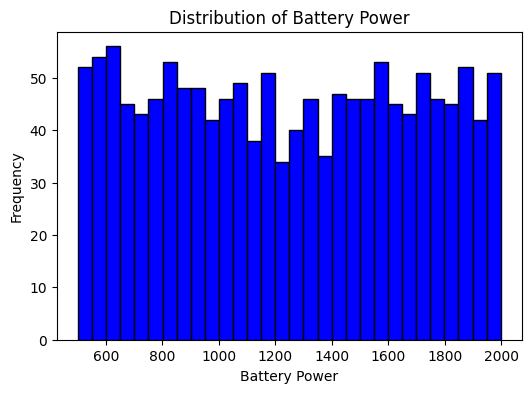

In [14]:
plt.figure(figsize=(6, 4))
plt.hist(df['battery_power'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Battery Power')
plt.xlabel('Battery Power')
plt.ylabel('Frequency')
plt.show()

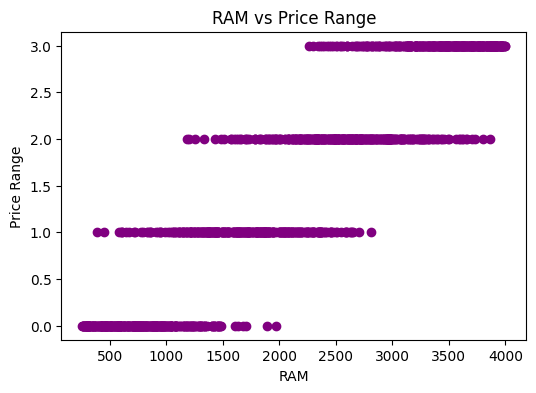

In [15]:
plt.figure(figsize=(6, 4))
plt.scatter(df['ram'], df['price_range'], color='purple')
plt.title('RAM vs Price Range')
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.show()

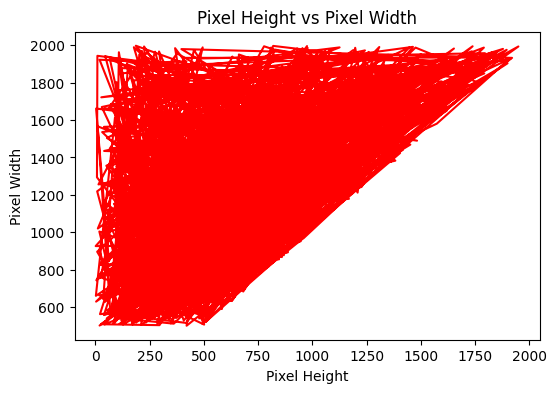

In [16]:
plt.figure(figsize=(6, 4))
plt.plot(df['px_height'], df['px_width'], color='red')
plt.title('Pixel Height vs Pixel Width')
plt.xlabel('Pixel Height')
plt.ylabel('Pixel Width')
plt.show()

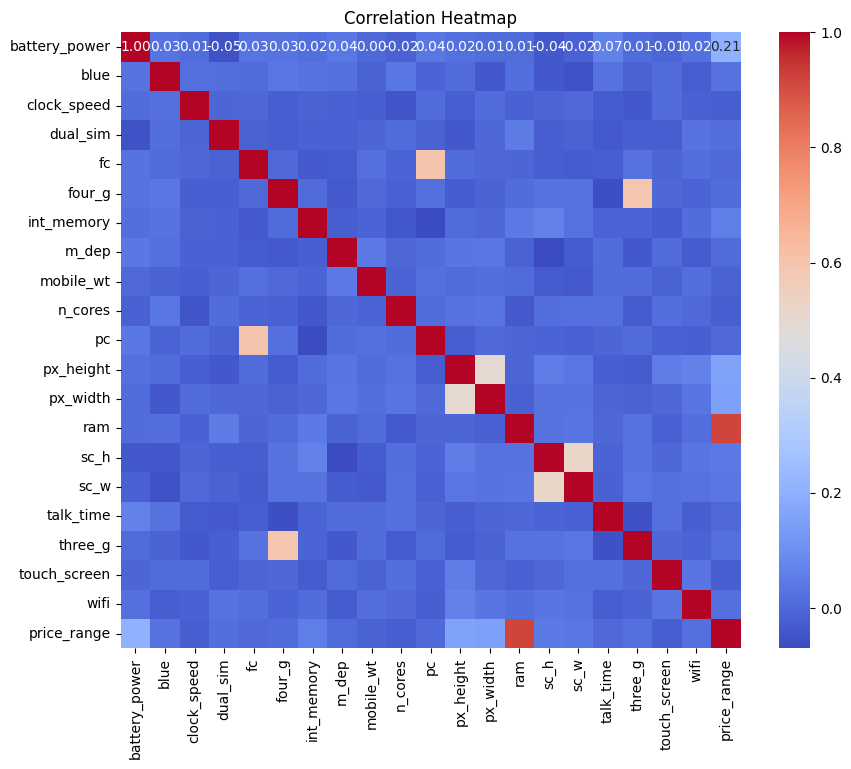

In [17]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

c:\Users\1\Desktop\IIS\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\1\Desktop\IIS\.venv\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\1\Desktop\IIS\.venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\1\Desktop\IIS\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

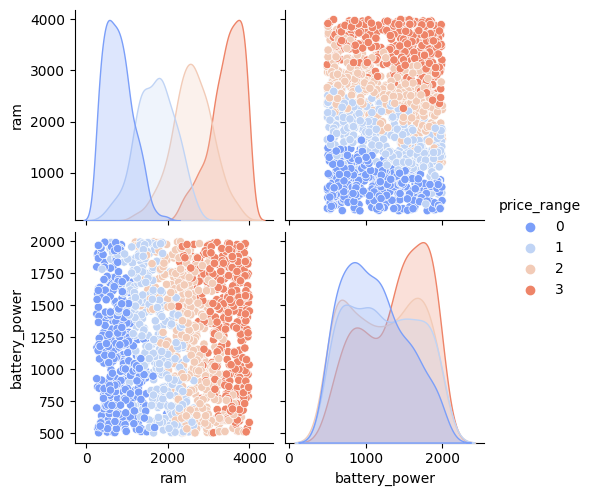

In [20]:
sns.pairplot(df[['ram', 'battery_power', 'price_range']], hue='price_range', palette='coolwarm')
plt.show()


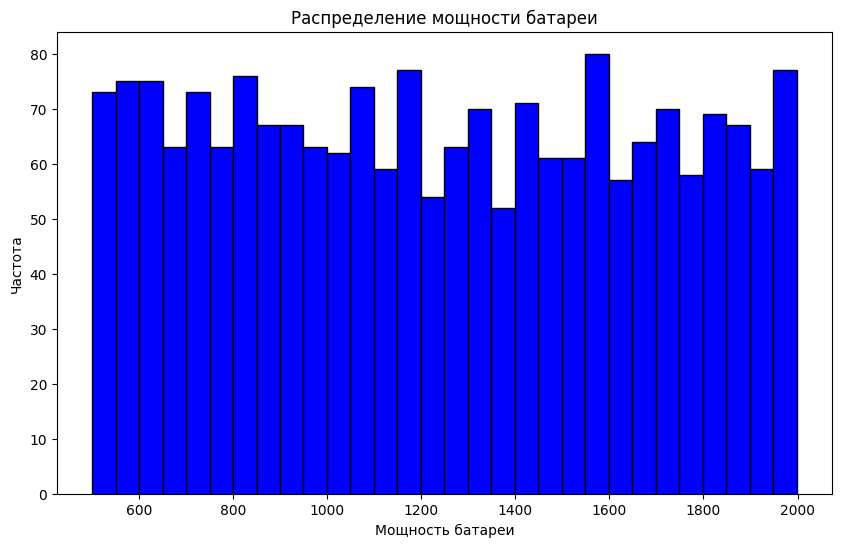

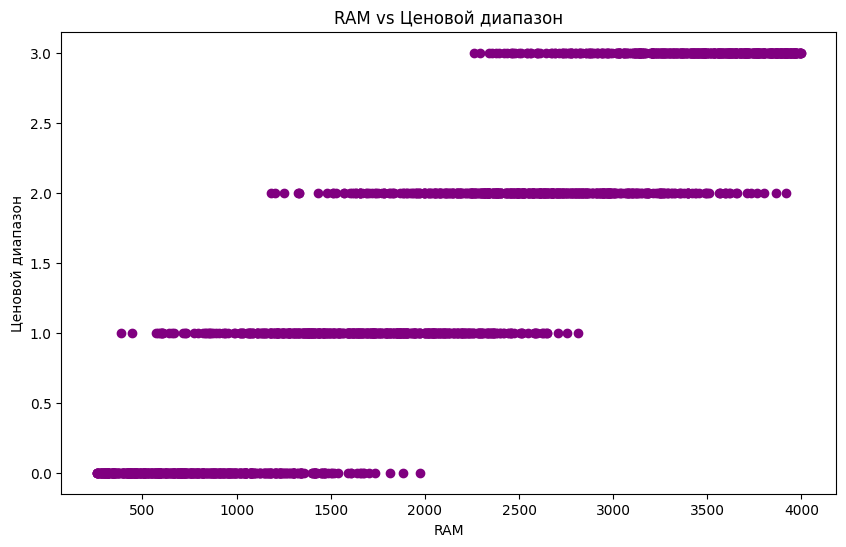

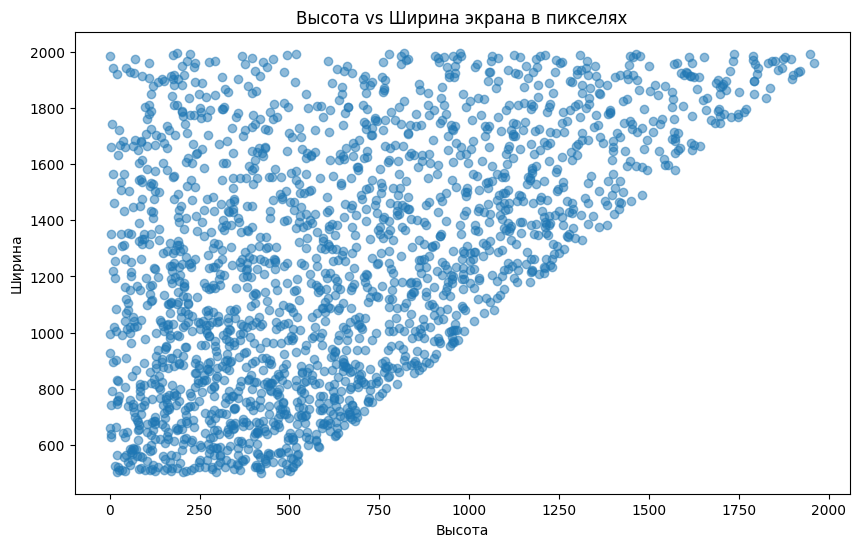

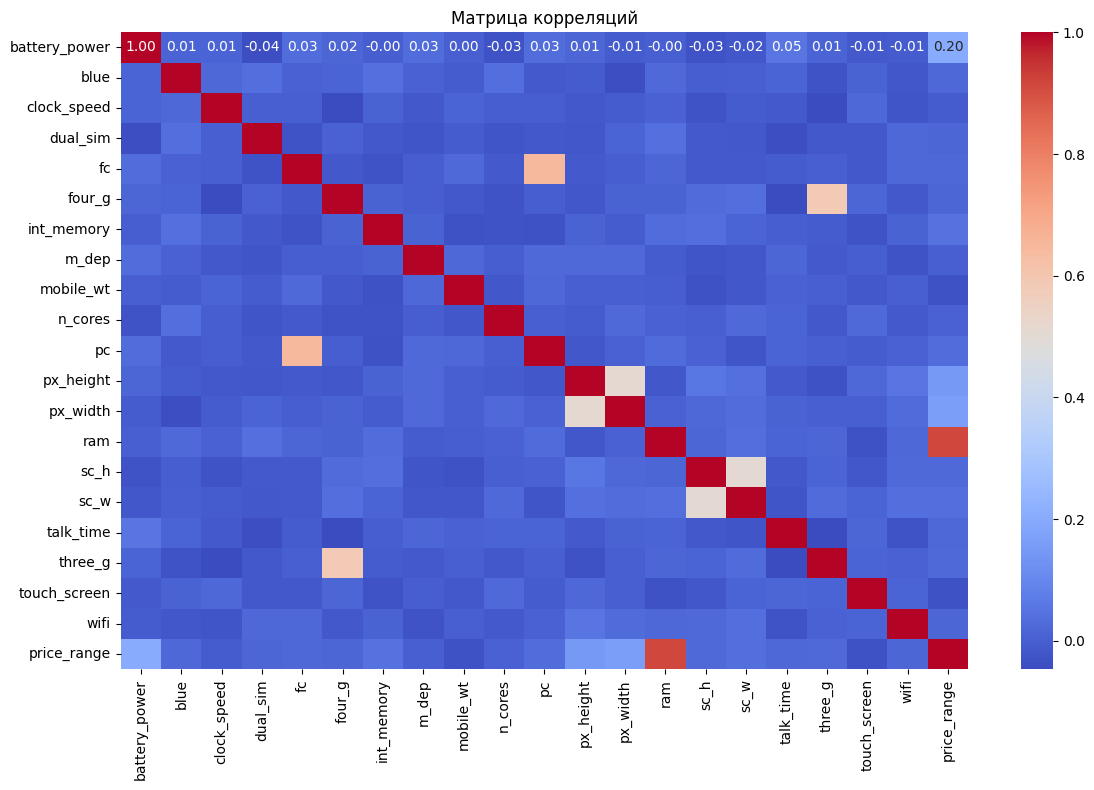

In [3]:


# График 1: Распределение мощности батареи
plt.figure(figsize=(10, 6))
plt.hist(df['battery_power'], bins=30, color='blue', edgecolor='black')
plt.title('Распределение мощности батареи')
plt.xlabel('Мощность батареи')
plt.ylabel('Частота')
plt.savefig('../eda/battery_distribution.png')
plt.show()

# График 2: RAM vs Ценовой диапазон
plt.figure(figsize=(10, 6))
plt.scatter(df['ram'], df['price_range'], color='purple')
plt.title('RAM vs Ценовой диапазон')
plt.xlabel('RAM')
plt.ylabel('Ценовой диапазон')
plt.savefig('../eda/ram_price_scatter.png')
plt.show()

# График 3: Разрешение экрана
plt.figure(figsize=(10, 6))
plt.scatter(df['px_height'], df['px_width'], alpha=0.5)
plt.title('Высота vs Ширина экрана в пикселях')
plt.xlabel('Высота')
plt.ylabel('Ширина')
plt.savefig('../eda/resolution.png')
plt.show()

# График 4: Тепловая карта корреляций
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.tight_layout()
plt.savefig('../eda/correlation_matrix.png')
plt.show()

# График 5: Интерактивный график
fig = px.scatter(df, x='ram', y='battery_power', color='price_range',
                 title='RAM vs Мощность батареи по ценовым диапазонам',
                 labels={'ram': 'RAM', 'battery_power': 'Мощность батареи',
                        'price_range': 'Ценовой диапазон'})
fig.write_html('../eda/interactive_plot.html')


Корреляция screen_ram_score с ценой: 0.534


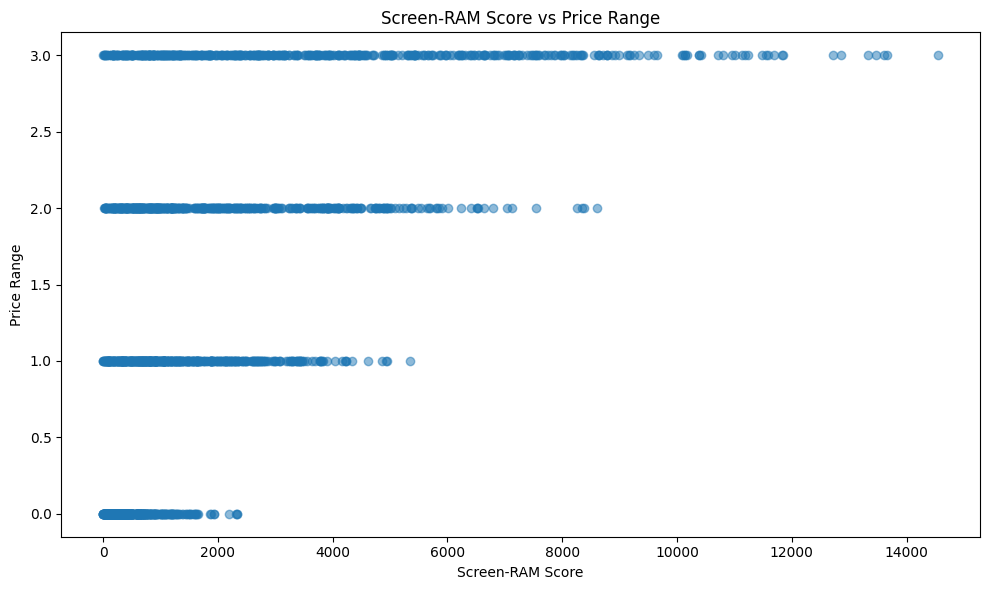

In [6]:
# Создание комплексного признака экран-производительность
df['screen_ram_score'] = (df['px_height'] * df['px_width'] * df['ram']) / (1000000)  # делим на 1M для нормализации

# Проверка корреляции с ценой
correlation = df['screen_ram_score'].corr(df['price_range'])
print(f"\nКорреляция screen_ram_score с ценой: {correlation:.3f}")

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(df['screen_ram_score'], df['price_range'], alpha=0.5)
plt.title('Screen-RAM Score vs Price Range')
plt.xlabel('Screen-RAM Score')
plt.ylabel('Price Range')
plt.tight_layout()
plt.savefig('../eda/screen_ram_correlation.png')
plt.show()